In [10]:
import numpy as np
import os
import torch
from misc.example_helper import *
import importlib
import processing
import models
%load_ext autoreload
%autoreload 2
importlib.reload(processing)
importlib.reload(models)
from processing.data_manager import SHREDDataManager
from processing.parametric_data_manager import ParametricSHREDDataManager
from models.shred_models import SHRED
from models.shred_models import evaluate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os

# Initialize SHREDDataManager
manager = SHREDDataManager(
    lags = 20,
    train_size = 0.6,
    val_size = 0.1,
    test_size = 0.3,
    compression = False,
    scaling = True,
    time=np.arange(0, 2000),
    method="all"
)


# Add data to manager (no sensors)
input_folder = "data4fields_npz"
# for filename in os.listdir(input_folder):
#     print('filename',filename)
#     if filename.endswith(".npz") and filename != 'ni_3D.npz':
#         file_path = os.path.join(input_folder, filename)
#         manager.add_field(
#             data=file_path,
#             id = str(os.path.splitext(filename)[0]),
#             random_sensors=3,
#         )
#         print(f"Processed: {filename}")


# Add data to manager (with sensors)
filename = 'ni_3D.npz'
file_path = os.path.join(input_folder, filename)
ni_3D = np.load(file_path)
ni_3D = ni_3D[ni_3D.files[0]]
mobile_sensors = [
    perimeter_walk(height = ni_3D.shape[1], width = ni_3D.shape[2], timesteps = ni_3D.shape[0], clockwise=True),
    perimeter_walk(height = ni_3D.shape[1], width = ni_3D.shape[2], timesteps = ni_3D.shape[0], clockwise=False)
]
manager.add_field(
    data=ni_3D,
    random_sensors=3,
    # stationary_sensors=[(7, 9), (0,0)],
    # mobile_sensors=mobile_sensors,
    id = str(os.path.splitext(filename)[0])
)


self.random_indices["train"] [1686 1206  718 ...  212  578 1321]
hi
hi again
dataset_dict {'train': (array([[[0.66350877, 0.49148067, 0.47663363],
        [0.71409357, 0.47104684, 0.49925089],
        [0.6680117 , 0.45539139, 0.50033134],
        ...,
        [0.54894737, 0.71348633, 0.54671834],
        [0.53923977, 0.59358692, 0.54462948],
        [0.54017544, 0.50424395, 0.46993489]],

       [[0.42087719, 0.6419365 , 0.52453325],
        [0.36701754, 0.5759824 , 0.49817045],
        [0.37953216, 0.5507702 , 0.42902213],
        ...,
        [0.62877193, 0.64973279, 0.59800334],
        [0.58859649, 0.66142722, 0.64856805],
        [0.53578947, 0.641685  , 0.59317737]],

       [[0.45725146, 0.4475951 , 0.49442492],
        [0.4474269 , 0.45539139, 0.6816296 ],
        [0.44421053, 0.50870795, 0.71461911],
        ...,
        [0.73356725, 0.4315624 , 0.49946698],
        [0.82192982, 0.39729645, 0.59036821],
        [0.70760234, 0.40446401, 0.64071684]],

       ...,

       [[0.39

In [26]:
manager.input_summary

field id sensor id                     sensor type location/trajectory
0    ni_3D   ni_3D-0  stationary (randomly selected)           (130, 79)
1    ni_3D   ni_3D-1  stationary (randomly selected)             (98, 4)
2    ni_3D   ni_3D-2  stationary (randomly selected)          (180, 245)

In [27]:
manager.sensor_measurements

time       ni_3D-0       ni_3D-1       ni_3D-2
0        0  4.699000e+16  5.209400e+16  5.155800e+16
1        1  4.771100e+16  5.188900e+16  5.147800e+16
2        2  4.944200e+16  5.111400e+16  5.321300e+16
3        3  5.124700e+16  4.956000e+16  5.584000e+16
4        4  5.136000e+16  4.987000e+16  5.632500e+16
...    ...           ...           ...           ...
1995  1995  1.453600e+17  1.145300e+17  1.047300e+17
1996  1996  1.585500e+17  1.146500e+17  1.101300e+17
1997  1997  1.658300e+17  1.162500e+17  1.200900e+17
1998  1998  1.578700e+17  1.244000e+17  1.278100e+17
1999  1999  1.433700e+17  1.421100e+17  1.456300e+17

[2000 rows x 4 columns]

In [28]:
train_set

In [29]:
# Get train/valid/test datasets
train_set, valid_set, test_set = manager.preprocess()

# Print dataset shapes
print('Data Shapes:')
print ('Reconstructor Data')
print('train X:', train_set.reconstructor_dataset.X.shape)
print('train Y:', train_set.reconstructor_dataset.Y.shape)
print('valid X:', valid_set.reconstructor_dataset.X.shape)
print('valid Y:', valid_set.reconstructor_dataset.Y.shape)
print('test X:', test_set.reconstructor_dataset.X.shape)
print('test Y:', test_set.reconstructor_dataset.Y.shape)

print ('Predictor Data')
print('train X:', train_set.predictor_dataset.X.shape)
print('train Y:', train_set.predictor_dataset.Y.shape)
print('valid X:', valid_set.predictor_dataset.X.shape)
print('valid Y:', valid_set.predictor_dataset.Y.shape)
print('test X:', test_set.predictor_dataset.X.shape)
print('test Y:', test_set.predictor_dataset.Y.shape)



print ('Sensor Forecaster Data')
print('train X:', train_set.sensor_forecaster_dataset.X.shape)
print('train Y:', train_set.sensor_forecaster_dataset.Y.shape)
print('valid X:', valid_set.sensor_forecaster_dataset.X.shape)
print('valid Y:', valid_set.sensor_forecaster_dataset.Y.shape)
print('test X:', test_set.sensor_forecaster_dataset.X.shape)
print('test Y:', test_set.sensor_forecaster_dataset.Y.shape)

[{'train': (array([[[0.66350877, 0.49148067, 0.47663363],
        [0.71409357, 0.47104684, 0.49925089],
        [0.6680117 , 0.45539139, 0.50033134],
        ...,
        [0.54894737, 0.71348633, 0.54671834],
        [0.53923977, 0.59358692, 0.54462948],
        [0.54017544, 0.50424395, 0.46993489]],

       [[0.42087719, 0.6419365 , 0.52453325],
        [0.36701754, 0.5759824 , 0.49817045],
        [0.37953216, 0.5507702 , 0.42902213],
        ...,
        [0.62877193, 0.64973279, 0.59800334],
        [0.58859649, 0.66142722, 0.64856805],
        [0.53578947, 0.641685  , 0.59317737]],

       [[0.45725146, 0.4475951 , 0.49442492],
        [0.4474269 , 0.45539139, 0.6816296 ],
        [0.44421053, 0.50870795, 0.71461911],
        ...,
        [0.73356725, 0.4315624 , 0.49946698],
        [0.82192982, 0.39729645, 0.59036821],
        [0.70760234, 0.40446401, 0.64071684]],

       ...,

       [[0.39      , 0.36196165, 0.26442031],
        [0.32479532, 0.41961647, 0.2583122 ],
        [0

In [15]:
# manager.postprocess(test_set.predictor_dataset.Y.detach().cpu().numpy())

In [30]:
print("Verify forecaster train set...")
print(torch.all(train_set.sensor_forecaster_dataset.X[1:, -1, :] == train_set.sensor_forecaster_dataset.Y[:-1, :]))
print("Verify forecaster valid set...")
print(torch.all(valid_set.sensor_forecaster_dataset.X[1:, -1, :] == valid_set.sensor_forecaster_dataset.Y[:-1, :]))
print("Verify forecaster test set...")
print(torch.all(test_set.sensor_forecaster_dataset.X[1:, -1, :] == test_set.sensor_forecaster_dataset.Y[:-1, :]))

Verify forecaster train set...
tensor(True)
Verify forecaster valid set...
tensor(True)
Verify forecaster test set...
tensor(True)


In [31]:
train_set.reconstructor_dataset

In [32]:
# initialize SHRED
shred = SHRED(sequence='LSTM', decoder='SDN')
# fit SHRED
valid_errors = shred.fit(train_set, valid_set, num_epochs=1000, patience=100, verbose=True)

Newest Version
input_size 3
output_size 65792
self._sequence_model_reconstructor.output_size 64

Fitting Reconstructor...


Epoch 1/1000: 100%|██████████| 19/19 [00:03<00:00,  4.76batch/s, loss=0.116, L2=0.609, val_loss=0.0313, val_L2=0.342]


KeyboardInterrupt: 

In [33]:
predictor_prediction = shred.predictor(test_set.predictor_dataset.X).detach().cpu().numpy()
predictor_prediction

TypeError: 'NoneType' object is not callable

In [ ]:
predictor_prediction_postprocess = manager.postprocess(data = predictor_prediction,uncompress = True, unscale = True, method = "predictor")
predictor_prediction_postprocess

method random_reconstructor
(400, 65792)


{'ni_3D': array([[3.2221764e+16, 3.1807179e+16, 3.1885442e+16, ..., 2.3919781e+16,
         2.3523635e+16, 2.3785357e+16],
        [2.7264485e+16, 2.6940610e+16, 2.7300698e+16, ..., 2.9890481e+16,
         2.9391217e+16, 2.9210882e+16],
        [2.7816875e+16, 2.7374425e+16, 2.7924711e+16, ..., 3.0895950e+16,
         3.0375701e+16, 3.0274247e+16],
        ...,
        [2.9197027e+16, 2.8984851e+16, 2.9517736e+16, ..., 2.8690800e+16,
         2.9131357e+16, 2.8977547e+16],
        [2.7622809e+16, 2.7746597e+16, 2.8253581e+16, ..., 3.1091030e+16,
         3.1567200e+16, 3.0951729e+16],
        [3.1923105e+16, 3.2039037e+16, 3.3008546e+16, ..., 2.5510626e+16,
         2.5541941e+16, 2.6177813e+16]], shape=(400, 65792), dtype=float32)}

In [ ]:
predictor_truth_postprocess = manager.postprocess(data = test_set.predictor_dataset.Y.detach().cpu().numpy(),uncompress = True, unscale = True, method = "predictor")
predictor_truth_postprocess

method random_reconstructor
(400, 65792)


{'ni_3D': array([[3.7820000e+16, 3.9998996e+16, 3.8735000e+16, ..., 2.2635002e+16,
         1.8864001e+16, 1.7236999e+16],
        [2.8270999e+16, 2.8593998e+16, 2.7136999e+16, ..., 3.3138001e+16,
         3.1461001e+16, 3.1274000e+16],
        [3.2754000e+16, 3.4333000e+16, 3.3610002e+16, ..., 2.8656999e+16,
         2.9782001e+16, 2.7667002e+16],
        ...,
        [4.3270000e+16, 3.7475999e+16, 3.5462001e+16, ..., 2.4026000e+16,
         2.3005000e+16, 2.4354000e+16],
        [3.4843002e+16, 3.3315999e+16, 3.3427000e+16, ..., 3.3371999e+16,
         3.0562998e+16, 3.3159999e+16],
        [3.7873000e+16, 3.5296000e+16, 3.5864001e+16, ..., 2.7003001e+16,
         2.6830001e+16, 3.1477998e+16]], shape=(400, 65792), dtype=float32)}

In [ ]:
l2 = lambda datatrue, datapred: torch.linalg.norm(datapred - datatrue) / torch.linalg.norm(datatrue)

for key in predictor_prediction_postprocess:
    print(np.linalg.norm(predictor_truth_postprocess[key].astype(np.float64) - predictor_prediction_postprocess[key].astype(np.float64))/np.linalg.norm(predictor_truth_postprocess[key].astype(np.float64)))

    # datatrue = torch.tensor(predictor_truth_postprocess[key])
    # datapred = torch.tensor(predictor_prediction_postprocess[key])

    
    # error =  l2(
    #     torch.tensor(predictor_truth_postprocess[key]),
    #     torch.tensor(predictor_prediction_postprocess[key])
    # )
    # print(torch.linalg.norm(datapred - datatrue))
    # print(error.item())

0.13803504411833556


In [ ]:
predictor_truth_postprocess['ni_3D']

array([[3.7820000e+16, 3.9998996e+16, 3.8735000e+16, ..., 2.2635002e+16,
        1.8864001e+16, 1.7236999e+16],
       [2.8270999e+16, 2.8593998e+16, 2.7136999e+16, ..., 3.3138001e+16,
        3.1461001e+16, 3.1274000e+16],
       [3.2754000e+16, 3.4333000e+16, 3.3610002e+16, ..., 2.8656999e+16,
        2.9782001e+16, 2.7667002e+16],
       ...,
       [4.3270000e+16, 3.7475999e+16, 3.5462001e+16, ..., 2.4026000e+16,
        2.3005000e+16, 2.4354000e+16],
       [3.4843002e+16, 3.3315999e+16, 3.3427000e+16, ..., 3.3371999e+16,
        3.0562998e+16, 3.3159999e+16],
       [3.7873000e+16, 3.5296000e+16, 3.5864001e+16, ..., 2.7003001e+16,
        2.6830001e+16, 3.1477998e+16]], shape=(400, 65792), dtype=float32)

In [ ]:
predictor_prediction_postprocess['ni_3D']

array([[3.2221764e+16, 3.1807179e+16, 3.1885442e+16, ..., 2.3919781e+16,
        2.3523635e+16, 2.3785357e+16],
       [2.7264485e+16, 2.6940610e+16, 2.7300698e+16, ..., 2.9890481e+16,
        2.9391217e+16, 2.9210882e+16],
       [2.7816875e+16, 2.7374425e+16, 2.7924711e+16, ..., 3.0895950e+16,
        3.0375701e+16, 3.0274247e+16],
       ...,
       [2.9197027e+16, 2.8984851e+16, 2.9517736e+16, ..., 2.8690800e+16,
        2.9131357e+16, 2.8977547e+16],
       [2.7622809e+16, 2.7746597e+16, 2.8253581e+16, ..., 3.1091030e+16,
        3.1567200e+16, 3.0951729e+16],
       [3.1923105e+16, 3.2039037e+16, 3.3008546e+16, ..., 2.5510626e+16,
        2.5541941e+16, 2.6177813e+16]], shape=(400, 65792), dtype=float32)

In [17]:
evaluate(shred = shred, test_dataset=test_set, data_manager=manager, uncompress=False, unscale = True)

method random_reconstructor
(600, 65792)
method random_reconstructor
(600, 65792)
method temporal_reconstructor
(600, 65792)
method temporal_reconstructor
(600, 65792)
sensor_forecaster_prediction_shape (621, 3)
lagged_sensor_forecaster_prediction torch.Size([600, 21, 3])
method temporal_reconstructor
(600, 65792)


ni_3D
random reconstructor    0.146115
temporal reconstructor  0.150189
forecaster              0.150317
sensor forecaster       0.107142

In [12]:
manager.data_processors[0].scaler

{'random_reconstructor': MinMaxScaler(),
 'temporal_reconstructor': MinMaxScaler()}

In [ ]:
test_set.predictor_dataset

In [ ]:
prediction = shred.predictor(test_set.predictor_dataset.X).detach().cpu().numpy()
prediction.shape

(400, 500)

In [ ]:
dataset_dict = manager.postprocess(prediction, uncompress = True, unscale = True, method = 'predictor')
true_dataset_dict = manager.postprocess(test_set.predictor_dataset.Y.numpy(),  uncompress = True, unscale = True, method = 'predictor')

method random_reconstructor
(400, 500)
unflattend
method random_reconstructor
(400, 500)
unflattend


In [16]:
dataset_dict['ni_3D'].shape

(400, 257, 256)

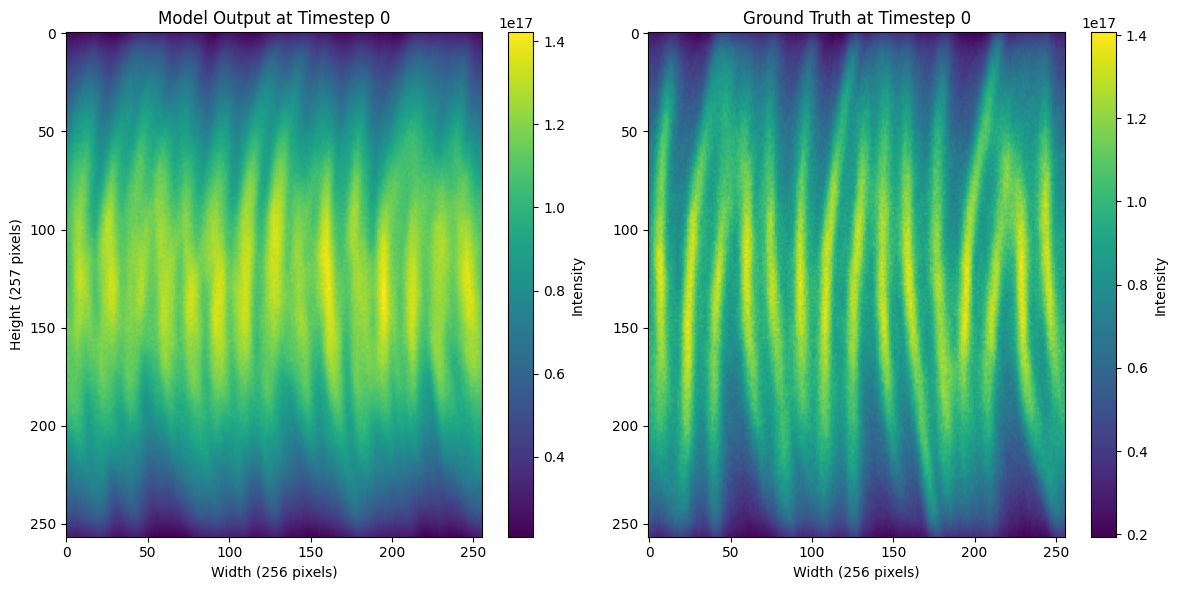

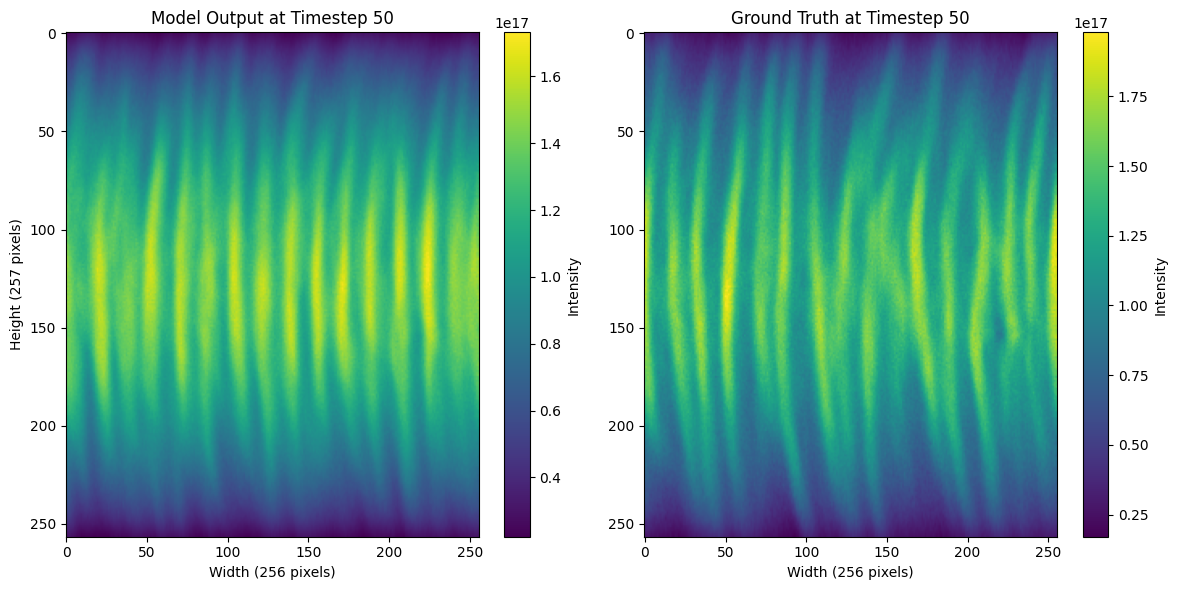

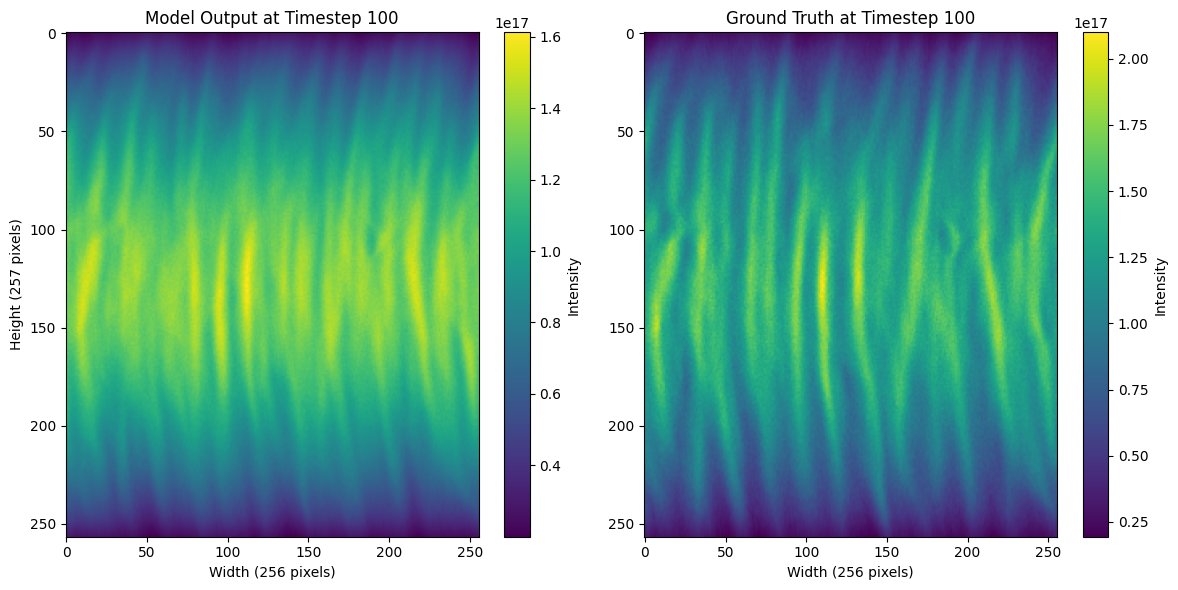

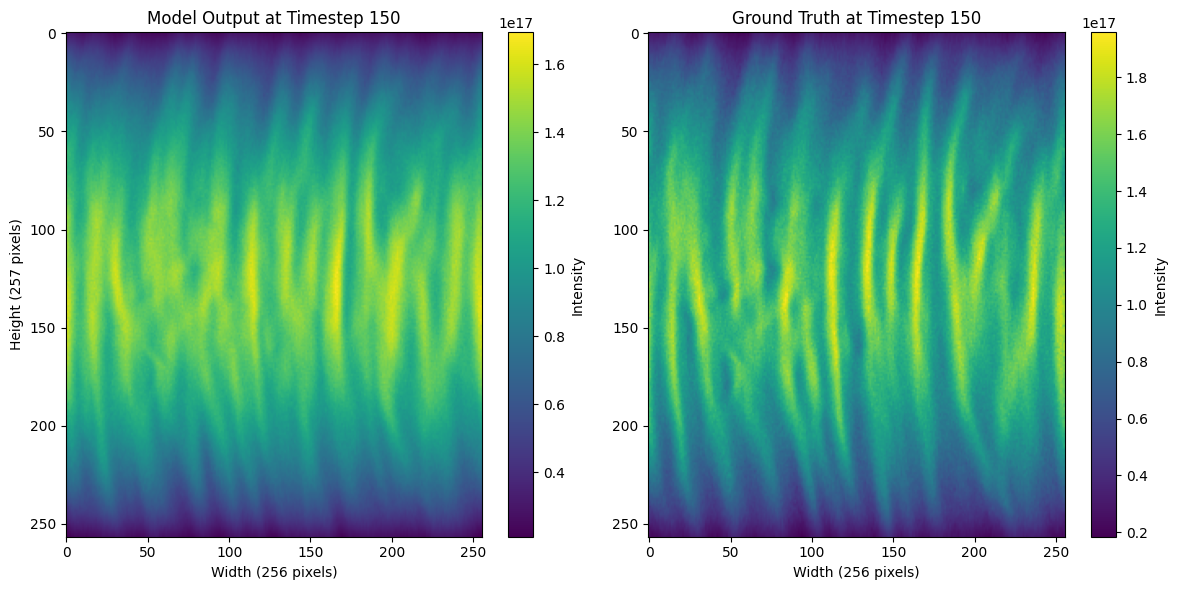

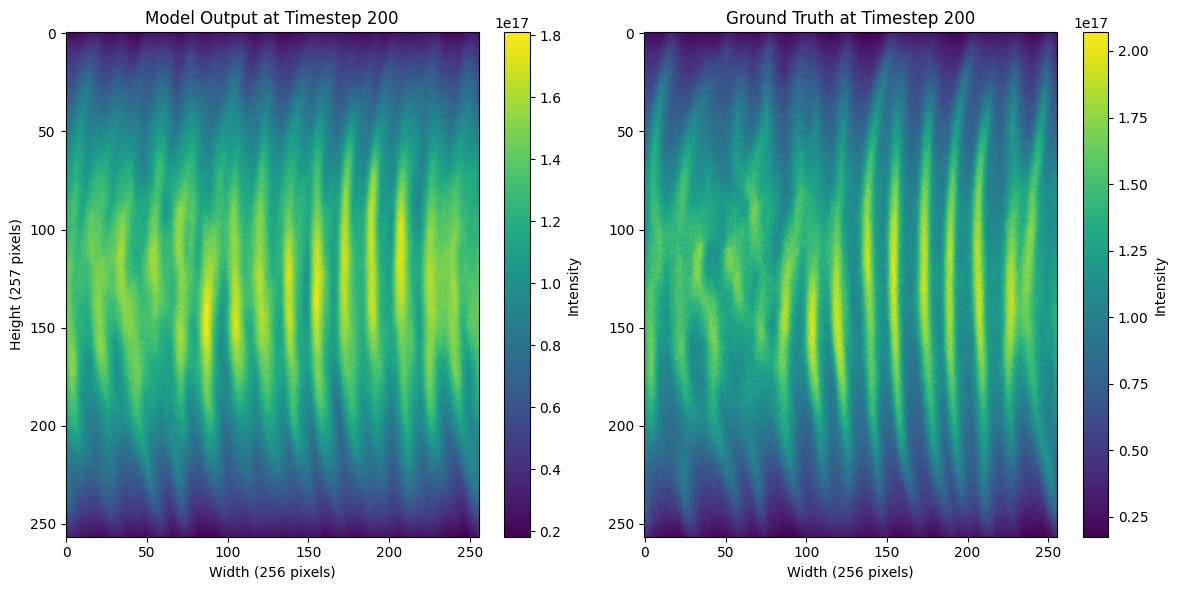

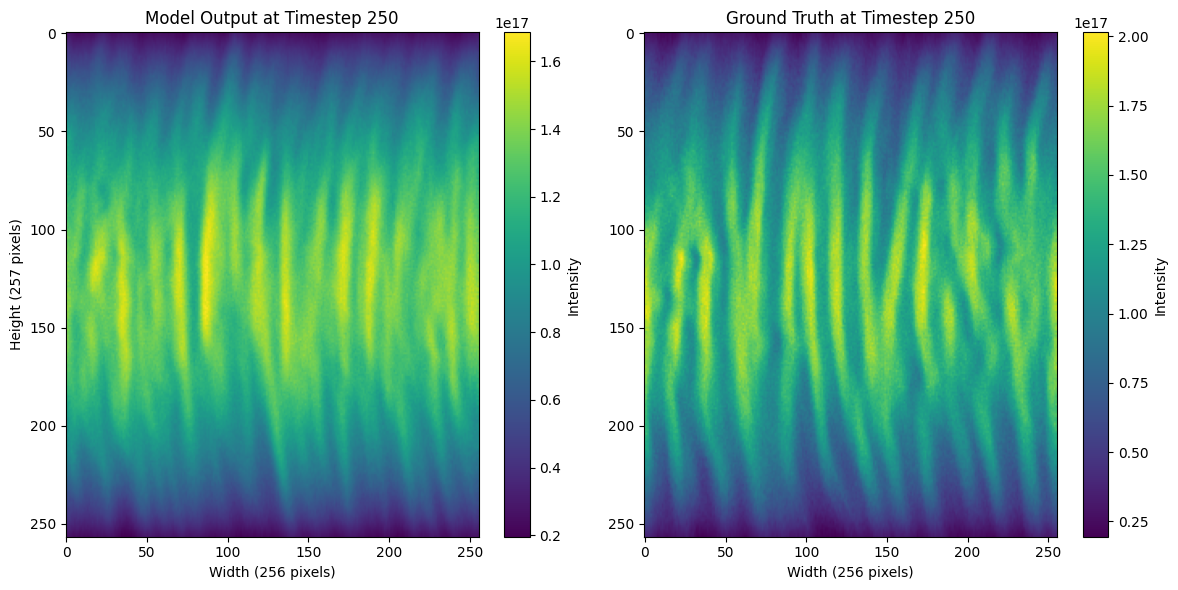

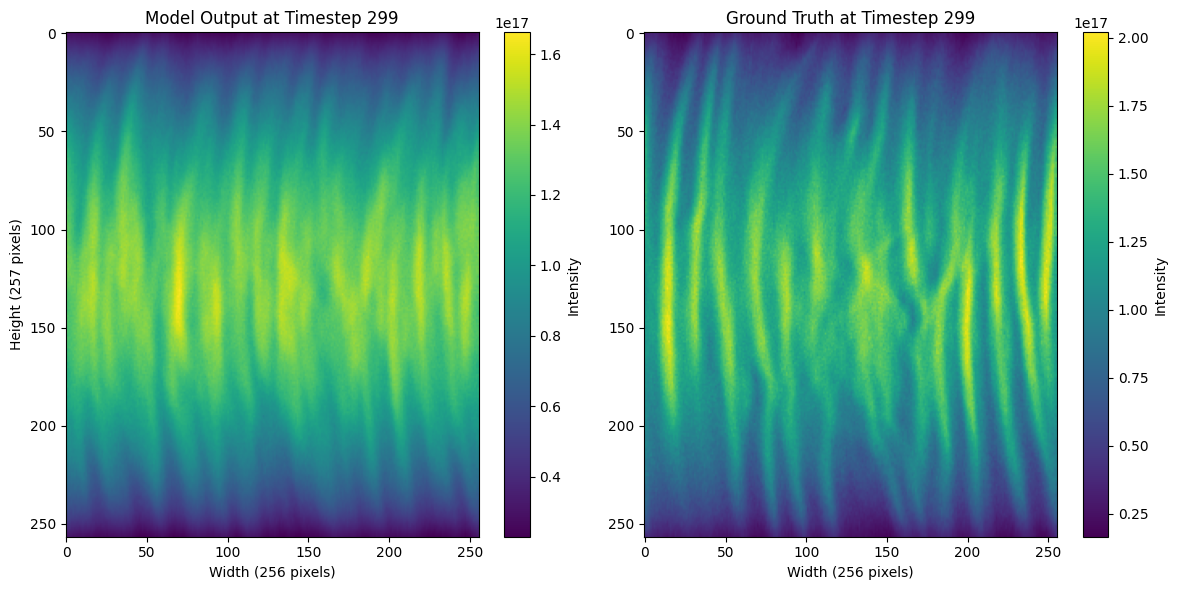

In [17]:
timesteps = [0,50,100,150,200,250,299]
for t in timesteps:
    plot_frame_comparison(dataset_dict['ni_3D'], true_dataset_dict['ni_3D'], timestep=t)  # Plot frame at timestep 100

In [339]:
fake_new_measurements = manager.generate_X(measurements=all_sensor_measurements)

In [340]:
fake_new_measurements.shape

torch.Size([2000, 21, 15])

In [332]:
# print(test_set.forecaster.Y.shape)
# fake = test_set.forecaster.Y[0:5,:]
# print(fake.shape)

time = np.arange(2020,2221)
fake = test_set.forecaster.Y[0:len(time),:]


# sensor_measurements_for_prediction = manager.generate_X(start = 2006, end = 2020, measurements = fake, time = time, forecaster=shred._sensor_forecaster)
sensor_measurements_for_prediction = manager.generate_X(start = 1999, end = 2000, forecaster=shred._sensor_forecaster)
sensor_measurements_for_prediction.shape

hello
hello
hello
hello
[[0.40742986 0.47897545 0.41693697 ... 1.         0.25157183 0.2098888 ]
 [0.42120873 0.50244979 0.42059753 ... 0.9243055  0.21881721 0.19440032]
 [0.41494846 0.4995862  0.41595162 ... 0.86197133 0.16993708 0.14810661]
 ...
 [0.43287099 0.45942148 0.45248675 ... 0.41218788 0.37016986 0.0893137 ]
 [0.42210832 0.46894794 0.41789372 ... 0.44039766 0.37288314 0.07896658]
 [       nan        nan        nan ...        nan        nan        nan]]


torch.Size([2, 21, 15])

In [ ]:
sensor_measurements_for_prediction.shape

torch.Size([22, 21, 15])

In [253]:
full_state_for_new_sensor_measurements = shred(sensor_measurements_for_prediction)

Newest Version


In [ ]:
full_state_for_new_sensor_measurements.shape

torch.Size([22, 80])

In [ ]:
sensor_measurements_for_prediction.shape

torch.Size([2021, 15])